In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Data preprocessing
# Define transformations for the training and testing data
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

# Define DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Step 2: Define the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Step 3: Instantiate the model, loss function, and optimizer
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Train the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# Step 5: Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f'Test Accuracy: {test_accuracy:.4f}')


Files already downloaded and verified
Files already downloaded and verified


KeyboardInterrupt: 

In [ ]:
import torchvision
import torchvision.transforms as transforms

# Define data transformations including normalization
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to PyTorch Tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize image tensors
])

# Load CIFAR-10 training dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)

# Load CIFAR-10 testing dataset
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, random_split

# Step 1: Prepare Dataset and Apply Feature Scaling

# Define data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-10 training dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)

# Load the CIFAR-10 testing dataset
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

# Step 2: Split Dataset into Training, Validation, and Testing Sets

# Split the training dataset into training and validation sets
train_size = int(0.6 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Step 3: Define the CNN Model

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Step 4: Instantiate the Model and Define Loss Function and Optimizer

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Step 5: Prepare DataLoader for Training, Validation, and Testing

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Step 6: Training the Model

def train(model, train_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 200 == 199:
                print(f'Epoch {epoch+1}, Batch {i+1}, Loss: {running_loss/200:.3f}')
                running_loss = 0.0

# Train the model
train(model, train_loader, criterion, optimizer)

# Step 7: Evaluate the Model

def evaluate(model, data_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in data_loader:
            inputs, labels = data
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

# Evaluate on validation set
val_accuracy = evaluate(model, val_loader)
print(f'Validation Accuracy: {val_accuracy:.2f}')

# Evaluate on test set
test_accuracy = evaluate(model, test_loader)
print(f'Test Accuracy: {test_accuracy:.2f}')


Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Batch 200, Loss: 2.302
Epoch 1, Batch 400, Loss: 2.296
Epoch 2, Batch 200, Loss: 2.282
Epoch 2, Batch 400, Loss: 2.252
Epoch 3, Batch 200, Loss: 2.152
Epoch 3, Batch 400, Loss: 2.069
Epoch 4, Batch 200, Loss: 1.982
Epoch 4, Batch 400, Loss: 1.946
Epoch 5, Batch 200, Loss: 1.885
Epoch 5, Batch 400, Loss: 1.861
Epoch 6, Batch 200, Loss: 1.800
Epoch 6, Batch 400, Loss: 1.773
Epoch 7, Batch 200, Loss: 1.713
Epoch 7, Batch 400, Loss: 1.690
Epoch 8, Batch 200, Loss: 1.634
Epoch 8, Batch 400, Loss: 1.629
Epoch 9, Batch 200, Loss: 1.599
Epoch 9, Batch 400, Loss: 1.577
Epoch 10, Batch 200, Loss: 1.539
Epoch 10, Batch 400, Loss: 1.557
Validation Accuracy: 0.45
Test Accuracy: 0.45


Convolutional Layer 1:
Input channels: 3 (RGB channels)
Output channels (filters): 16
Kernel size: 3x3
Padding: 1
Activation function: ReLU

MaxPooling Layer 1:
Kernel size: 2x2
Stride: 2

Convolutional Layer 2:
Input channels: 16 (output channels of previous layer)
Output channels (filters): 32
Kernel size: 3x3
Padding: 1
Activation function: ReLU

MaxPooling Layer 2:
Kernel size: 2x2
Stride: 2

Fully Connected (Linear) Layers:
Input size: 32 * 8 * 8 (output channels of previous layer * height * width)
Output size of first FC layer: 128
Output size of second FC layer: 64
Activation function: ReLU

Dropout Layer:
Dropout rate: 0.5

Output Layer:
Output size: 10 (number of classes in CIFAR-10 dataset)
Activation function: Softmax (for classification)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20, Train Loss: 1.7615, Val Loss: 1.4636
Epoch 2/20, Train Loss: 1.4186, Val Loss: 1.2761
Epoch 3/20, Train Loss: 1.2726, Val Loss: 1.1501
Epoch 4/20, Train Loss: 1.1495, Val Loss: 1.0776
Epoch 5/20, Train Loss: 1.0563, Val Loss: 1.0388
Epoch 6/20, Train Loss: 0.9830, Val Loss: 1.0307
Epoch 7/20, Train Loss: 0.9066, Val Loss: 0.9783
Epoch 8/20, Train Loss: 0.8449, Val Loss: 1.0071
Epoch 9/20, Train Loss: 0.7869, Val Loss: 1.0008
Epoch 10/20, Train Loss: 0.7271, Val Loss: 1.0355
Epoch 11/20, Train Loss: 0.6830, Val Loss: 1.0113
Epoch 12/20, Train Loss: 0.6296, Val Loss: 1.0533
Epoch 13/20, Train Loss: 0.5835, Val Loss: 1.1217
Epoch 14/20, Train Loss: 0.5419, Val Loss: 1.1606
Epoch 15/20, Train Loss: 0.5022, Val Loss: 1.1778
Epoch 16/20, Train Loss: 0.4639, Val Loss: 1.2580
Epoch 17/20, Train Loss: 0.4333, Val Loss: 1.3529
Epoch 18/20, Train Loss: 0.4015, Val Loss: 1.3779
Epoch 19/20, Train Loss: 0.3745, 

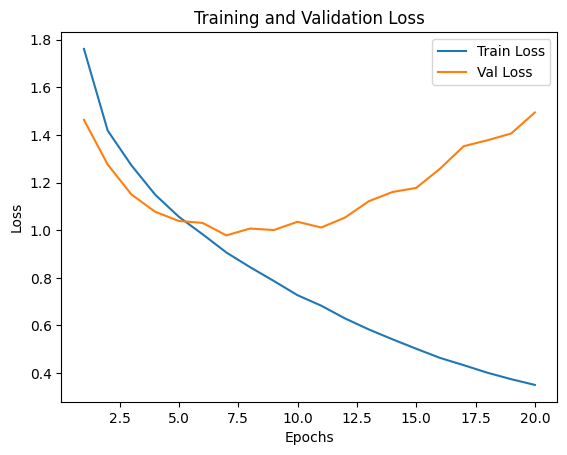

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-10 training dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)

# Load the CIFAR-10 testing dataset
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

# Split the training dataset into training and validation sets
train_size = int(0.6 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Instantiate the model
model = CNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# DataLoader for training and validation sets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
        epoch_val_loss = val_loss / len(val_loader.dataset)
        val_losses.append(epoch_val_loss)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

    return train_losses, val_losses

# Train the model
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer)

# Plot training and validation loss
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


The choice of loss function in a machine learning model plays a pivotal role in determining how effectively the model learns from the data. In classification tasks where the target labels are represented as integers, such as in the CIFAR-10 dataset, the sparse categorical cross-entropy loss function is commonly employed.

In this context, each image in CIFAR-10 belongs to one of ten distinct classes, identified by integer labels ranging from 0 to 9. The model's final layer typically employs softmax activation, yielding a probability distribution across these classes for each input image. The index with the highest probability within this distribution denotes the predicted class.

Sparse categorical cross-entropy loss offers a streamlined approach to training models with integer labels. It directly accepts these integer labels without necessitating explicit one-hot encoding. Internally, it transforms these integers into equivalent one-hot encoded vectors, facilitating efficient computation.

By utilizing sparse categorical cross-entropy, practitioners can simplify implementation, conserve memory, and optimize computational resources, particularly in scenarios involving extensive datasets and numerous classes. Thus, this choice stands as a pragmatic and effective strategy for classification tasks like CIFAR-10 image classification.

In [ ]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# DataLoader for testing set
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    all_predictions = []
    all_targets = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.tolist())
            all_targets.extend(labels.tolist())

    accuracy = accuracy_score(all_targets, all_predictions)
    cm = confusion_matrix(all_targets, all_predictions)
    precision = precision_score(all_targets, all_predictions, average='macro')
    recall = recall_score(all_targets, all_predictions, average='macro')
    
    return accuracy, cm, precision, recall

# Evaluate the model
test_accuracy, confusion_mat, precision, recall = evaluate_model(model, test_loader)

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Confusion Matrix:\n{confusion_mat}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


Test Accuracy: 0.6502
Confusion Matrix:
[[743  13  39  32  15   7   5   9  91  46]
 [ 24 816   3  16   4   5   9   7  33  83]
 [105  10 428  94 107 100  81  46  19  10]
 [ 36  14  52 483  46 217  84  35  15  18]
 [ 31   6  87  99 521  66  88  75  21   6]
 [ 14  13  41 206  46 579  38  48   6   9]
 [  8   5  40 104  36  47 738   5   9   8]
 [ 36   1  22  45  78  94   8 701   1  14]
 [ 89  43   3  25   5   9   3   8 782  33]
 [ 49 104   5  31   7  13  11  26  43 711]]
Precision: 0.6530
Recall: 0.6502


Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20, Train Loss: 2.3049, Val Loss: 2.3046
Epoch 2/20, Train Loss: 2.3044, Val Loss: 2.3042
Epoch 3/20, Train Loss: 2.3039, Val Loss: 2.3039
Epoch 4/20, Train Loss: 2.3036, Val Loss: 2.3036
Epoch 5/20, Train Loss: 2.3035, Val Loss: 2.3032
Epoch 6/20, Train Loss: 2.3028, Val Loss: 2.3029
Epoch 7/20, Train Loss: 2.3028, Val Loss: 2.3025
Epoch 8/20, Train Loss: 2.3024, Val Loss: 2.3025
Epoch 9/20, Train Loss: 2.3023, Val Loss: 2.3024
Epoch 10/20, Train Loss: 2.3026, Val Loss: 2.3024
Epoch 11/20, Train Loss: 2.3021, Val Loss: 2.3024
Epoch 12/20, Train Loss: 2.3021, Val Loss: 2.3023
Epoch 13/20, Train Loss: 2.3018, Val Loss: 2.3023
Epoch 14/20, Train Loss: 2.3024, Val Loss: 2.3023
Epoch 15/20, Train Loss: 2.3022, Val Loss: 2.3023
Epoch 16/20, Train Loss: 2.3021, Val Loss: 2.3023
Epoch 17/20, Train Loss: 2.3022, Val Loss: 2.3022
Epoch 18/20, Train Loss: 2.3022, Val Loss: 2.3022
Epoch 19/20, Train Loss: 2.3021, 

KeyboardInterrupt: 

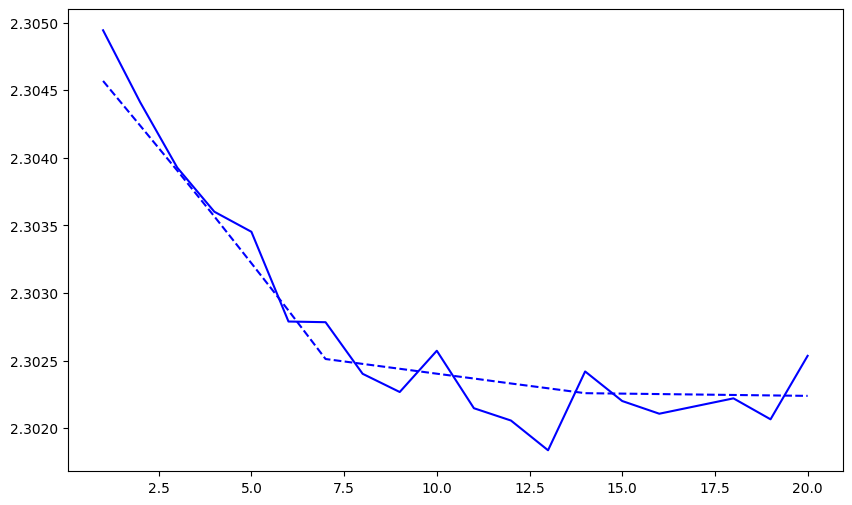

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-10 training dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)

# Load the CIFAR-10 testing dataset
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

# Split the training dataset into training and validation sets
train_size = int(0.6 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# DataLoader for training and validation sets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, lr_scheduler, num_epochs=20):
    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
        epoch_val_loss = val_loss / len(val_loader.dataset)
        val_losses.append(epoch_val_loss)

        lr_scheduler.step()

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

    return train_losses, val_losses

# Different learning rates to try
learning_rates = [0.0001, 0.001, 0.01, 0.1]
lr_labels = ['0.0001', '0.001', '0.01', '0.1']
colors = ['b', 'g', 'r', 'm']

# Plot training and validation loss for different learning rates
plt.figure(figsize=(10, 6))
for lr, label, color in zip(learning_rates, lr_labels, colors):
    # Instantiate the model
    model = CNN()

    # Define loss function, optimizer, and learning rate scheduler
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    # Train the model
    train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, lr_scheduler)

    # Plot training and validation loss
    plt.plot(range(1, len(train_losses) + 1), train_losses, label=f'Train Loss (lr={label})', linestyle='-', color=color)
    plt.plot(range(1, len(val_losses) + 1), val_losses, label=f'Val Loss (lr={label})', linestyle='--', color=color)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Different Learning Rates')
plt.legend()
plt.grid(True)
plt()
